In [2]:
!pip install gym matplotlib glfw mujoco ray[rllib]

In [3]:
import  ray.rllib.algorithms.sac

print(dir( ray.rllib.algorithms.sac))  # This should list 'SACTrainer' if it's available

/usr/local/lib/python3.10/dist-packages/flax/configurations.py:42: DeprecationWarning: jax.config.define_bool_state is deprecated. Please use other libraries for configuration instead.
  return jax_config.define_bool_state('flax_' + name, default, help)
/usr/local/lib/python3.10/dist-packages/flax/linen/activation.py:36: DeprecationWarning: jax.nn.normalize is deprecated. Use jax.nn.standardize instead.
  from jax.nn import normalize
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <


['RNNSAC', 'RNNSACConfig', 'RNNSACTorchPolicy', 'SAC', 'SACConfig', 'SACTFPolicy', 'SACTorchPolicy', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'rnnsac', 'rnnsac_torch_model', 'rnnsac_torch_policy', 'sac', 'sac_tf_model', 'sac_tf_policy', 'sac_torch_model', 'sac_torch_policy']


In [4]:
import gym
from ray.rllib.algorithms.sac import SACConfig
import matplotlib.pyplot as plt
import torch

config_dict = {
    "env": "InvertedPendulum-v4",
    "framework": "torch",
    "num_gpus": 1,
    "num_workers": 0,

    "algorithm": "SAC",

    "use_automatic_entropy_tuning": True,
    "target_entropy": "auto",

    "model": {
        "fcnet_hiddens": [256, 256],
        "fcnet_activation": "relu",
    },

    "optimization": {
        "actor_learning_rate": 0.0003,
        "critic_learning_rate": 0.0003,
        "entropy_learning_rate": 0.0003,
    },

    "exploration_config": {
        "type": "StochasticSampling",
    },

    "buffer_size": 50000,  # Smaller buffer size for quicker learning
    "rollout_fragment_length": 1,
    "train_batch_size": 128,  # Smaller batch size for quicker updates
    "timesteps_per_iteration": 1000,
    "learning_starts": 1000,  # Start learning after fewer steps
    "gamma": 0.99,
    "l2_reg": 1e-4,

    "stop": {
        "training_iteration": 500
    },
}

# Convert the dictionary to a SACConfig object
config = SACConfig().from_dict(config_dict)
# Build an Algorithm object from the config
algo = config.build()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-12-21 17:33:48,184	WARNING deprecation.py:50 -- DeprecationWarning: `rllib/algorithms/simple_q/` has been deprecated. Use `rllib_contrib/simple_q/` instead. This will raise an error in the future!
/usr/local/lib/python3.10/dist-packages/ray/rllib/algorithms/algorithm.py:483: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
/usr/local/lib/python3.10/dist-packages/ray/tune/logger/unified.py:53: RayDepr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Iteration: 1, Mean Reward: 6.0625
Iteration: 2, Mean Reward: 6.6
Iteration: 3, Mean Reward: 6.235955056179775
Iteration: 4, Mean Reward: 6.28
Iteration: 5, Mean Reward: 6.3
Iteration: 6, Mean Reward: 6.24
Iteration: 7, Mean Reward: 6.09
Iteration: 8, Mean Reward: 5.69


2023-12-21 17:33:59,775	WARNING deprecation.py:50 -- DeprecationWarning: `ray.rllib.execution.train_ops.multi_gpu_train_one_step` has been deprecated. This will raise an error in the future!


Iteration: 9, Mean Reward: 5.42
Iteration: 10, Mean Reward: 5.64
Iteration: 11, Mean Reward: 5.52
Iteration: 12, Mean Reward: 5.39
Iteration: 13, Mean Reward: 5.36
Iteration: 14, Mean Reward: 5.55
Iteration: 15, Mean Reward: 6.13
Iteration: 16, Mean Reward: 6.87
Iteration: 17, Mean Reward: 7.35
Iteration: 18, Mean Reward: 8.38
Iteration: 19, Mean Reward: 9.06
Iteration: 20, Mean Reward: 9.85
Iteration: 21, Mean Reward: 10.92
Iteration: 22, Mean Reward: 11.56
Iteration: 23, Mean Reward: 12.75
Iteration: 24, Mean Reward: 13.27
Iteration: 25, Mean Reward: 14.53
Iteration: 26, Mean Reward: 14.99
Iteration: 27, Mean Reward: 16.04
Iteration: 28, Mean Reward: 17.17
Iteration: 29, Mean Reward: 18.21
Iteration: 30, Mean Reward: 19.09
Iteration: 31, Mean Reward: 19.09
Iteration: 32, Mean Reward: 20.18
Iteration: 33, Mean Reward: 21.96
Iteration: 34, Mean Reward: 22.8
Iteration: 35, Mean Reward: 23.47
Iteration: 36, Mean Reward: 24.34
Iteration: 37, Mean Reward: 25.52
Iteration: 38, Mean Reward: 

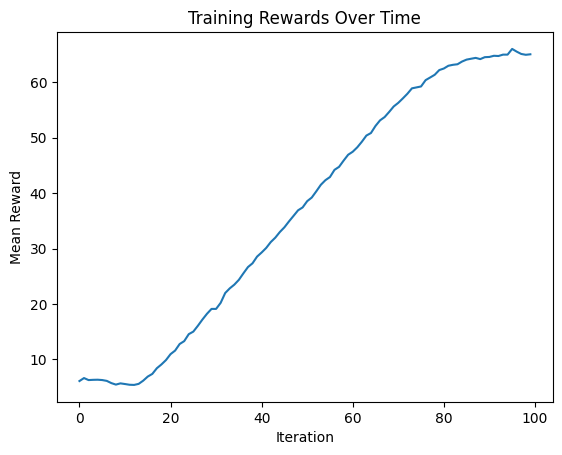

In [5]:
# Initialize a list to store rewards
rewards = []

# Run training iterations
NUM_ITERATIONS = 100
for i in range(NUM_ITERATIONS):
    result = algo.train()
    rewards.append(result['episode_reward_mean'])

    # Print out the key metrics after each iteration
    print(f"Iteration: {i+1}, Mean Reward: {result['episode_reward_mean']}")


# Plotting the rewards
plt.plot(rewards)
plt.title('Training Rewards Over Time')
plt.xlabel('Iteration')
plt.ylabel('Mean Reward')
plt.show()

# Save the trained model
checkpoint_path = algo.save("/content")
#print(f"Model checkpoint saved at: {checkpoint_path}")

In [6]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [7]:
!pip install pyvirtualdisplay

In [8]:
from pyvirtualdisplay import Display

# Create a virtual display
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()


In [9]:
import gym
import cv2


# Load the trained model for testing
algo.restore(checkpoint_path)
# Initialize the environment
env = gym.make("InvertedPendulum-v4")

# Setup video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('InvertedPendulum-v4_output.avi', fourcc, 20.0, (500, 500))

# Test the agent
state = env.reset()
for _ in range(100):
    action = algo.compute_single_action(state)
    next_state, _, _, _ = env.step(action)
    frame = env.render(mode='rgb_array')
    frame_resized = cv2.resize(frame, (500, 500))
    out.write(cv2.cvtColor(frame_resized, cv2.COLOR_RGB2BGR))
    state = next_state

# Clean up
env.close()
out.release()

# Close the virtual display
virtual_display.stop()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2023-12-21 17:50:00,165	INFO worker.py:1724 -- Started a local Ray instance.
2023-12-21 17:50:03,545	INFO trainable.py:585 -- Restored on 172.28.0.12 from checkpoint: Checkpoint(filesystem=local, path=/content)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step AP